# Make CRX, MEF2D, and RAX logos for supplemental figure

In [1]:
import os
import sys
import logomaker
import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(0, "utils")
from utils import plot_utils, predicted_occupancy

plot_utils.set_manuscript_params()

in validate_matrix(): Row sums in df are not close to 1. Reormalizing rows...


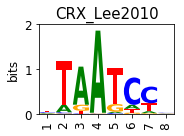

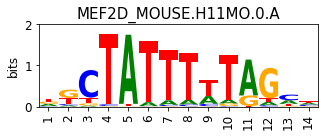

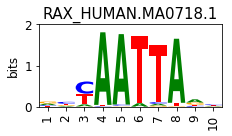

In [2]:
# Load in PWMs
pwms = predicted_occupancy.read_pwm_files(os.path.join("Data", "Downloaded", "Pwm", "photoreceptorAndEnrichedMotifs.meme"))
pwms = pwms[pwms.index.str.contains("CRX|MEF2D|RAX")]
pwms = pwms.rename({"CRX_Corbo": "CRX_Lee2010"})

for name, pwm in pwms.items():
    pwm = logomaker.transform_matrix(pwm, from_type="probability", to_type="information")
    fig, ax = plt.subplots(figsize=(len(pwm) / 3, 2))
    logomaker.Logo(pwm, ax=ax)
    ax.set_xticks(np.arange(len(pwm)))
    ax.set_xticklabels(np.arange(len(pwm)) + 1, rotation=90)
    ax.set_yticks([0, 1, 2])
    ax.set_ylabel("bits")
    ax.set_title(name)
    plot_utils.save_fig(fig, os.path.join("Figures", f"logo{name.split('_')[0]}"), timestamp=False)